# Project 3 - What's cooking!

## Setup

### Imports

All the imports go here, to make it easier to find them later.

In [1]:
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, log_loss
from sklearn import svm #support vector machines

C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Reding in the training file

In [2]:
data = pd.read_json('train.json') 

print("An example of what the data looks like:")
print("")
print(data)

print("")
print("Here the number of recepies of each cuisine")
print("")
print(data['cuisine'].value_counts())

An example of what the data looks like:

            cuisine     id                                        ingredients
0             greek  10259  [romaine lettuce, black olives, grape tomatoes...
1       southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...
2          filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
3            indian  22213                [water, vegetable oil, wheat, salt]
4            indian  13162  [black pepper, shallots, cornflour, cayenne pe...
5          jamaican   6602  [plain flour, sugar, butter, eggs, fresh ginge...
6           spanish  42779  [olive oil, salt, medium shrimp, pepper, garli...
7           italian   3735  [sugar, pistachio nuts, white almond bark, flo...
8           mexican  16903  [olive oil, purple onion, fresh pineapple, por...
9           italian  12734  [chopped tomatoes, fresh basil, garlic, extra-...
10          italian   5875  [pimentos, sweet pepper, dried oregano, olive ...
11          chinese  45

In [13]:
print(data.loc[data.ingredients.str.len() == 1])
print(data.loc[data.id==41124])

           cuisine     id                 ingredients
940       japanese   4734                [sushi rice]
2088    vietnamese   7833        [dried rice noodles]
6787        indian  36818      [plain low-fat yogurt]
7011        indian  19772           [unsalted butter]
8181      japanese  16116                      [udon]
8852          thai  29738               [sticky rice]
8990        indian  41124                    [butter]
10506      mexican  32631            [corn tortillas]
13178         thai  29570                   [grained]
17804  southern_us  29849      [lemonade concentrate]
18136         thai  39186              [jasmine rice]
18324       indian  14335           [unsalted butter]
21008      italian  39221           [cherry tomatoes]
22119       french  41135                    [butter]
22387       indian  36874                [cumin seed]
23512       french  35028            [haricots verts]
26887      mexican  18593             [vegetable oil]
29294      spanish   7460   

In [3]:
# The set of different cuisines
cuisines = data.cuisine.unique()

# To find the different ingredients, we need to clean them up a little. 
def clean(string) :
    s = string.replace('-',' ') # read low-fat the same as low fat
    s = string.replace('&', 'and') # read & and and as the same 
    s = re.sub('\((.*?)\)', '', s) # remove everythin g in brackets
    s = re.sub('\d{1,2}\%', '', s) # remove things of the form d% or dd%, where d is a digit
    s = ' '.join(s.split()) # remove extra white spaces
    
    return s

ing_list = data.ingredients.values.tolist()
raw_ingredients = [clean(x) for ing in ing_list for x in ing]

ingredients = sorted(set(raw_ingredients))

print("There are %d different ingredients." % len(ingredients))
print("")
print("")
print("Here is the very long list:")
print("")
print(ingredients)
    

There are 6698 different ingredients.


Here is the very long list:

['2 1/2 to 3 lb. chicken, cut into serving pieces', '7 Up', '8 ounc ziti pasta, cook and drain', 'A Taste of Thai Rice Noodles', 'Accent Seasoning', 'Adobo All Purpose Seasoning', 'Alaskan king crab legs', 'Alexia Waffle Fries', 'Alfredo sauce', 'Amarena cherries', 'Amaretti Cookies', 'American cheese', 'Anaheim chile', 'Angostura bitters', 'Argo Corn Starch', 'Asian chili sauce', 'Asian sweet chili sauce', 'Azteca Flour Tortillas', 'BACARDIÂ® Mixers Margarita Mix', 'BACARDIÂ® Superior', "BREAKSTONE'S Sour Cream", 'Baileys Irish Cream Liqueur', 'Balsamico Bianco', 'Barilla Linguine', 'Barilla Oven-Ready Lasagne', 'Barilla Plus Pasta', 'Bartlett Pear', 'Belgian endive', 'Bengali 5 Spice', 'Bertolli Garlic Alfredo Sauce', 'Bertolli Tomato and Basil Sauce', 'BertolliÂ® Alfredo Sauce', 'BertolliÂ® Arrabbiata Sauce', 'BertolliÂ® Classico Olive Oil', "Best Food's Mayonnaise with Lime Juice", 'Best FoodsÂ® Real Mayonnaise', 

### Recipies as vectors

Here we have functions that take a list of incredients and produces a vector to represent them. 


In [4]:
# build a dictionary that to each ingredient assigns its index
ingredient_index = {}
for i in range(0,len(ingredients)) :
    ingredient_index[ingredients[i]] = i

# the same for cuisines 
cuisine_index = {}
for i in range(0, len(cuisines)) : 
    cuisine_index[cuisines[i]] = i 
    
def ingredients_to_vector(ings) :
    vect = np.zeros(len(ingredients))
    for ing in ings :
        vect[ingredient_index[clean(ing)]] = 1
        
    return vect

def cuisine_to_vector(cus) : 
    vect = np.zeros(20)
    vect[cuisine_index[cus]] = 1
    return vect

vect_list = [ingredients_to_vector(ing) for ing in ing_list]
target_list = [cuisine_to_vector(cus) for cus in data.cuisine.values.tolist()]

print(len(vect_list))
print(len(target_list))

print(vect_list[30064])
print(target_list[30064])


39774
39774
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
for t in random.sample(target_list, 20) :
    print(t)
    
print(cuisine_index)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0

## Split data

In [6]:
X = np.c_[vect_list]
Y = np.c_[target_list]

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

print(y_train)

(39774, 6698)
(39774, 20)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
# this function returns a NN 
# with layers of size ns
# with the i'th layer having ns[i] neurons.
# hidden_act_func is the activation function for the hidden neurons.
# out_act_func is the final activation function
def build_network(ns, hidden_act_func, out_act_func) :
    # initialize model
    model = tf.keras.Sequential()
    # make the first hidden layer
    model.add(tf.keras.layers.Dense(ns[1], activation=hidden_act_func, input_dim=ns[0]))
    # fill in hidden layers
    for n in ns[2:-1] :
            model.add(tf.keras.layers.Dense(n, activation=hidden_act_func))
    # add output layer
    model.add(tf.keras.layers.Dense(ns[-1], activation=out_act_func))
    # Now we compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

print("Bulding network")
#net = build_network([3,4,5,6], 'sigmoid')
net = build_network([len(ingredients),400,20], 'sigmoid', 'softmax')
net.fit(x_train, y_train, epochs = 2, verbose = 1, batch_size = 200)
print("Network build and trained")

Bulding network
Epoch 1/2
25455/25455 [==============================] - 20s 786us/step - loss: 2.0818 - acc: 0.4394
Epoch 2/2
25455/25455 [==============================] - 19s 759us/step - loss: 1.3338 - acc: 0.6499
Network build and trained


In [9]:
def pick_best_guess(prop_vect) :
    guess = np.zeros(prop_vect.shape)
    guess[np.argmax(prop_vect)] = 1
    return guess

prediction = np.apply_along_axis(pick_best_guess, 1, net.predict(x_test))
print(prediction.shape)
error = accuracy_score(prediction, y_test)
print("")
print("With %d hidden neurons we get an accuracy of %f" % (100, error))


(7955, 20)

With 100 hidden neurons we get an accuracy of 0.690635


# Using support vector machines

In [62]:
# The sci-kit learn svm expects a list with labels, rather than vectors
# so we change our target vectors. 
svm_y_train = np.apply_along_axis(np.argmax, 1, y_train)
svm_y_val = np.apply_along_axis(np.argmax, 1, y_val)

for myC in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] :
    clf = svm.LinearSVC(C = myC) # create svm classifier 
    clf.fit(x_train, svm_y_train)
    svm_predictions = clf.predict(x_val)
    error = accuracy_score(svm_predictions, svm_y_val)
    print("Using linear SVC with a C of %f we get an accuracy of %f" % (myC, error))
    print("")

Using linear SVC with a C of 0.000100 we get an accuracy of 0.490572

Using linear SVC with a C of 0.001000 we get an accuracy of 0.639692

Using linear SVC with a C of 0.010000 we get an accuracy of 0.749686

Using linear SVC with a C of 0.100000 we get an accuracy of 0.780170

Using linear SVC with a C of 1.000000 we get an accuracy of 0.759428

Using linear SVC with a C of 10.000000 we get an accuracy of 0.714173

Using linear SVC with a C of 100.000000 we get an accuracy of 0.676147

Using linear SVC with a C of 1000.000000 we get an accuracy of 0.661534



In [13]:
clf = svm.LinearSVC(C = 0.1) # create svm classifier 
clf.fit(x_train, svm_y_train)
svm_predictions = clf.predict(x_val)

def vector_to_ingredients(vect) :
    ings = []
    for i in range(0, vect.shape[0]) :
        if vect[i] == 1 :
            ings.append(ingredients[i])
            
    return ings

for i in range(0, svm_predictions.shape[0]) :
    if svm_predictions[i] != svm_y_val[i] : 
        print("Misclassified %s as %s" % (cuisines[svm_y_val[i]], cuisines[svm_predictions[i]]))
        print("The ingredients were")
        print(vector_to_ingredients(x_val[i]))
        print("")



Misclassified italian as greek
The ingredients were
['basil dried leaves', 'butter', 'dried oregano', 'feta cheese', 'fresh spinach', 'grated parmesan cheese', 'jalapeno chilies', 'minced garlic', 'olive oil', 'pizza crust', 'sundried tomato pesto', 'sweet onion', 'tomatoes']

Misclassified mexican as spanish
The ingredients were
['beef broth', 'carrots', 'chopped cilantro fresh', 'garlic cloves', 'green bell pepper', 'ground cumin', 'ground round', 'hot sauce', 'large eggs', 'onions', 'pepper', 'pimentos', 'salt', 'shredded cabbage', 'tomatoes', 'zucchini']

Misclassified japanese as filipino
The ingredients were
['garlic', 'ginger', 'ground black pepper', 'olive oil', 'porterhouse steaks', 'red miso', 'sesame oil', 'soy sauce']

Misclassified french as italian
The ingredients were
['fresh lemon juice', 'ladyfingers', 'large egg yolks', 'large eggs', 'lemon', 'salt', 'sugar', 'water', 'whipping cream']

Misclassified japanese as chinese
The ingredients were
['cold water', 'corn starch

['chocolate morsels', 'cinnamon sticks', 'coffee granules', 'cold water', 'granulated sugar', 'ladyfingers', 'large eggs', 'milk', 'powdered sugar', 'unflavored gelatin', 'vanilla extract', 'whipping cream']

Misclassified cajun_creole as french
The ingredients were
['cajun spice mix', 'dijon mustard', 'garlic cloves', 'herbes de provence', 'lemon', 'mayonaise']

Misclassified irish as italian
The ingredients were
['brown sugar', 'ground cinnamon', 'hazelnut oil', 'hazelnuts', 'salt', 'steel-cut oats', 'sweet cherries', 'water']

Misclassified mexican as southern_us
The ingredients were
['all-purpose flour', 'baking powder', 'butter', 'evaporated milk', 'frosting', 'grated lemon zest', 'large eggs', 'milk', 'salt', 'sugar', 'sweetened condensed milk', 'vanilla extract', 'whipping cream']

Misclassified italian as french
The ingredients were
['coffee beans', 'ground cinnamon', 'low-fat milk', 'mint sprigs', 'sugar', 'vanilla extract', 'water']

Misclassified southern_us as italian
The i

The ingredients were
['bicarbonate of soda', 'black treacle', 'butter', 'golden syrup', 'ground cinnamon', 'ground ginger', 'large eggs', 'milk', 'nutmeg', 'plain flour', 'sugar']

Misclassified brazilian as cajun_creole
The ingredients were
['all-purpose flour', 'avocado', 'black pepper', 'cayenne pepper', 'chopped cilantro', 'dried thyme', 'emerils original essence', 'extra-virgin olive oil', 'fresh lime juice', 'garlic', 'garlic powder', 'green bell pepper', 'hearts of palm', 'onion powder', 'oregano', 'paprika', 'salt', 'tomatoes', 'vegetable oil', 'white wine vinegar', 'yellow onion']

Misclassified chinese as korean
The ingredients were
['brown rice', 'carrots', 'dark sesame oil', 'dry white wine', 'green peas', 'large eggs', 'low sodium soy sauce', 'minced garlic', 'pepper', 'shiitake', 'sliced green onions', 'water']

Misclassified cajun_creole as british
The ingredients were
['lemon wedge', 'redfish', 'seasoning', 'unsalted butter']

Misclassified southern_us as british
The in

The ingredients were
['all-purpose flour', 'butter', 'corn starch', 'sugar']

Misclassified japanese as chinese
The ingredients were
['cabbage', 'flour', 'large eggs', 'oil', 'panko', 'pepper', 'pork loin chops', 'salt', 'toasted sesame oil']

Misclassified chinese as italian
The ingredients were
['chinese cabbage', 'olive oil', 'onions', 'red chili peppers', 'sambal olek', 'scallions', 'sugar', 'tomatoes', 'white wine vinegar']

Misclassified japanese as indian
The ingredients were
['baking powder', 'flour', 'oil', 'salt', 'sugar', 'vegetable oil', 'veggies', 'water']

Misclassified thai as mexican
The ingredients were
['chicken thighs', 'cilantro', 'garlic puree', 'pepper', 'salt', 'sherry', 'soy sauce', 'sugar']

Misclassified mexican as italian
The ingredients were
['diced onions', 'egg whites', 'fresh mint', 'garlic', 'ground sirloin', 'olive oil', 'onions', 'pepper', 'plum tomatoes', 'salt', 'tomato sauce', 'water', 'white rice']

Misclassified moroccan as southern_us
The ingredi

['boneless skinless chicken breasts', 'garlic', 'green bell pepper', 'jerk sauce', 'olive oil', 'pizza sauce', 'portabello mushroom', 'salami', 'shredded mozzarella cheese', 'thin pizza crust']

Misclassified japanese as chinese
The ingredients were
['corn starch', 'eggs', 'extra firm tofu', 'garlic', 'ground white pepper', 'low sodium soy sauce', 'panko breadcrumbs', 'red chili peppers', 'rice vinegar', 'sesame oil', 'sesame seeds', 'spring onions', 'sprinkles', 'sugar', 'vegetable oil']

Misclassified spanish as mexican
The ingredients were
['cilantro sprigs', 'garlic cloves', 'ground black pepper', 'jalapeno chilies', 'jicama', 'kosher salt', 'large shrimp', 'lime', 'romaine lettuce leaves', 'scallions']

Misclassified irish as italian
The ingredients were
['beef', 'chopped onion', 'fresh basil', 'garlic cloves', 'long-grain rice', 'olive oil', 'plum tomatoes', 'sliced mushrooms', 'water', 'yellow squash', 'zucchini']

Misclassified british as southern_us
The ingredients were
['all-

['black pepper', 'eggs', 'flour', 'granulated garlic', 'milk', 'oil', 'paprika', 'salt', 'thyme', 'water']

Misclassified spanish as french
The ingredients were
["Piment d'Espelette", 'armagnac', 'dry bread crumbs', 'eggs', 'garlic', 'heavy cream', 'ketchup', 'leeks', 'mayonaise', 'merluza', 'mustard', 'olive oil', 'pepper', 'salt', 'shrimp', 'tomatoes', 'white wine']

Misclassified spanish as mexican
The ingredients were
['bacon drippings', 'butter', 'chile pepper', 'eggs', 'finely chopped fresh parsley', 'onions', 'pepper', 'potatoes', 'red bell pepper', 'salt', 'shredded cheddar cheese', 'water']

Misclassified french as italian
The ingredients were
['fresh basil leaves', 'garlic', 'grated parmesan cheese', 'olive oil']

Misclassified jamaican as filipino
The ingredients were
['cinnamon sticks', 'coconut milk', 'corn', 'corn starch', 'evaporated milk', 'nutmeg', 'salt', 'sweetened condensed milk', 'vanilla', 'water']

Misclassified french as italian
The ingredients were
['buttermilk


Misclassified italian as french
The ingredients were
['blackberries', 'cream of tartar', 'large egg whites', 'salt', 'semi-sweet chocolate morsels', 'strawberries', 'sugar', 'vanilla extract', 'water', 'whipped topping', 'white vinegar']

Misclassified french as italian
The ingredients were
['angel hair', 'carrots', 'coco', 'extra-virgin olive oil', 'fine sea salt', 'fresh basil leaves', 'garlic', 'grated parmesan cheese', 'green beans', 'ground black pepper', 'potatoes', 'sea salt', 'zucchini']

Misclassified chinese as vietnamese
The ingredients were
['chicken wings', 'ground pepper', 'oil', 'salt', 'spices', 'spring onions']

Misclassified chinese as thai
The ingredients were
['boneless skinless chicken breast halves', 'carrots', 'crushed red pepper flakes', 'curry powder', 'fresh ginger', 'garlic', 'green onions', 'noodles', 'oyster sauce', 'peanut butter', 'peanut oil', 'soy sauce', 'straw mushrooms', 'water chestnuts']

Misclassified japanese as greek
The ingredients were
['brow


Misclassified brazilian as indian
The ingredients were
['black pepper', 'cayenne pepper', 'cherry tomatoes', 'cilantro leaves', 'coconut milk', 'fresh ginger', 'garlic', 'green chilies', 'ground coriander', 'ground cumin', 'ground turmeric', 'lime', 'onions', 'salt', 'vegetable oil', 'vegetable stock']

Misclassified brazilian as italian
The ingredients were
['alcohol', 'brewed coffee', 'dark chocolate', 'ground almonds', 'powdered sugar', 'rum']

Misclassified korean as japanese
The ingredients were
['boneless skinless chicken breasts', 'chutney', 'cilantro', 'daikon', 'garlic', 'glass noodles', 'green leaf lettuce', 'lime', 'mirin', 'onions', 'rice vinegar', 'sesame oil', 'soy sauce']

Misclassified greek as italian
The ingredients were
['black olives', 'chopped fresh mint', 'feta cheese crumbles', 'fettuccine pasta', 'fresh tomatoes', 'salt and ground black pepper']

Misclassified spanish as french
The ingredients were
['butter', 'dry white wine', 'fresh tarragon', 'halibut fillets

['flaked coconut', 'large egg whites', 'lime juice', 'salt', 'unsweetened cocoa powder', 'white sugar']

Misclassified vietnamese as korean
The ingredients were
['chopped cilantro fresh', 'crushed red pepper flakes', 'dark brown sugar', 'extra large shrimp', 'fish sauce', 'garlic', 'scallions', 'vegetable oil', 'water', 'yellow onion']

Misclassified mexican as southern_us
The ingredients were
['all-purpose flour', 'butter', 'chopped pecans', 'confectioners sugar']

Misclassified southern_us as french
The ingredients were
['golden brown sugar', 'ham', 'honey', 'unsweetened apple juice', 'whole grain dijon mustard']

Misclassified british as indian
The ingredients were
['active dry yeast', 'milk', 'oat flour', 'salt', 'warm water', 'white sugar', 'whole wheat flour']

Misclassified irish as southern_us
The ingredients were
['baking soda', 'butter', 'buttermilk', 'flour', 'pepper', 'potatoes', 'salt']

Misclassified japanese as southern_us
The ingredients were
['all-purpose flour', 'baki

['cilantro leaves', 'garlic', 'salt', 'shrimp shells', 'vegetable oil', 'white peppercorns']

Misclassified irish as french
The ingredients were
['butter', 'fresh orange juice', 'grated orange', 'ground cinnamon', 'ground cloves', 'ground nutmeg', 'maple sugar', 'maple syrup', 'non-fat sour cream', 'phyllo dough', 'rhubarb', 'salt', 'vanilla extract', 'whipping cream']

Misclassified filipino as southern_us
The ingredients were
['butter', 'carrots', 'celery', 'chicken broth', 'chicken leg quarters', 'cooking oil', 'elbow macaroni', 'ham', 'milk', 'pepper', 'salt', 'water', 'yellow onion']

Misclassified mexican as italian
The ingredients were
['butter', 'honey', 'white sugar', 'yams']

Misclassified vietnamese as thai
The ingredients were
['Conimex Wok Olie', 'Conimex Woksaus Specials Vietnamese Gember Knoflook', 'basil', 'chicken breasts', 'eggplant', 'jasmine rice', 'onions']

Misclassified irish as mexican
The ingredients were
['adobo sauce', 'all-purpose flour', 'baking powder', 'b

['brown sugar', 'garlic', 'hot water', 'red chili peppers', 'roasted peanuts', 'salt', 'soy sauce', 'tempeh', 'vegetable oil']

Misclassified cajun_creole as italian
The ingredients were
['chopped cooked ham', 'cooked chicken', 'jambalaya mix', 'tomato sauce', 'water']

Misclassified mexican as southern_us
The ingredients were
['all-purpose flour', 'butter', 'salt', 'water']

Misclassified mexican as japanese
The ingredients were
['brown rice', 'clam juice', 'garlic', 'ginger', 'green peas', 'italian pork sausage', 'low sodium vegetable stock', 'saffron', 'sea salt', 'shrimp', 'vegetable oil', 'yellow onion']

Misclassified spanish as italian
The ingredients were
['amaretto', 'blanched almonds', 'heavy cream', 'lemon', 'light corn syrup', 'nonfat dry milk powder', 'orange', 'sage leaves', 'sugar', 'unflavored gelatin', 'water', 'whole milk']

Misclassified greek as moroccan
The ingredients were
['cinnamon sticks', 'orange', 'pears', 'red grape', 'rose water', 'strawberries', 'sugar', '

Misclassified southern_us as irish
The ingredients were
['all-purpose flour', 'bacon', 'garlic salt', 'ground black pepper', 'ground turkey', 'liquid', 'onions', 'peas', 'potatoes', 'salt', 'sugar', 'tomatoes with juice', 'water']

Misclassified vietnamese as korean
The ingredients were
['beef', 'dark soy sauce', 'garlic', 'ginger juice', 'honey', 'kiwi fruits', 'onions', 'pepper', 'rice wine', 'walnuts']

Misclassified thai as mexican
The ingredients were
['Jif Creamy Peanut Butter', 'chicken breasts', 'cooked chicken', 'green onions', 'sauce', 'shredded lettuce', 'tortillas']

Misclassified korean as vietnamese
The ingredients were
['fish sauce', 'fresh ginger', 'garlic', 'perilla', 'red chili peppers', 'red chili powder', 'rice flour', 'salt', 'water']

Misclassified french as southern_us
The ingredients were
['egg whites', 'light corn syrup', 'sugar', 'vanilla extract']

Misclassified french as italian
The ingredients were
['anchovy fillets', 'black olives', 'capers', 'cayenne pepp


Misclassified brazilian as italian
The ingredients were
['baking powder', 'fresh lime juice', 'grated parmesan cheese', 'large eggs', 'long-grain rice', 'powdered sugar', 'sugar', 'vegetable oil', 'whole milk']

Misclassified chinese as italian
The ingredients were
['black pepper', 'coarse sea salt', 'garlic cloves', 'olive oil', 'pork belly', 'rosemary', 'thyme', 'white wine']

Misclassified french as italian
The ingredients were
['chopped celery', 'cooking spray', 'dry white wine', 'fennel', 'fresh orange juice', 'grated orange', 'halibut fillets', 'italian seasoning', 'minced garlic', 'olive oil', 'onions', 'pepper', 'salt', 'tomatoes']

Misclassified southern_us as mexican
The ingredients were
['assorted fresh vegetables', 'cayenne pepper', 'cream cheese', 'cucumber', 'kosher salt', 'mayonaise', 'sour cream', 'white onion']

Misclassified southern_us as italian
The ingredients were
['all-purpose flour', 'almond extract', 'baking powder', 'butter', 'flour', 'heavy cream', 'ice crea

['bay leaf', 'black mustard seeds', 'black peppercorns', 'chickpeas', 'chopped garlic', 'cinnamon', 'coriander', 'cumin seed', 'figs', 'fresh coriander', 'green chilies', 'ground cumin', 'olive oil', 'onions', 'orange', 'pitted black olives', 'salt', 'spinach', 'vegetable stock']

Misclassified chinese as thai
The ingredients were
['black rice', 'corn flakes', 'glutinous rice', 'jujube', 'longan', 'mung beans', 'peanuts', 'red beans', 'walnuts', 'water']

Misclassified filipino as spanish
The ingredients were
['black pepper', 'boiling water', 'chicken sausage', 'extra-virgin olive oil', 'garlic', 'green pepper', 'ground cumin', 'jalapeno chilies', 'lime', 'lime rind', 'olive oil', 'orange bell pepper', 'pearl couscous', 'pineapple', 'red pepper', 'saffron', 'salt', 'shrimp', 'smoked paprika', 'turbinado', 'white onion', 'white wine', 'zucchini']

Misclassified italian as french
The ingredients were
['baking potatoes', 'eggs', 'fine sea salt', 'flour']

Misclassified japanese as vietnam


Misclassified brazilian as mexican
The ingredients were
['black beans', 'broth', 'brown rice', 'cilantro', 'cumin', 'garlic cloves', 'green pepper', 'hot pepper', 'juice', 'olive oil', 'onions', 'pepper', 'red pepper flakes', 'salt', 'sweet potatoes', 'thyme', 'tomato sauce', 'tomatoes', 'water']

Misclassified mexican as cajun_creole
The ingredients were
['ancho', 'bay leaf', 'boiling water', 'dried oregano', 'dried thyme', 'garlic cloves', 'ground black pepper', 'ground cloves', 'plantains', 'red wine vinegar', 'reduced sodium chicken broth', 'rendered bacon fat', 'stew meat', 'worcestershire sauce', 'yellow onion']

Misclassified italian as southern_us
The ingredients were
['apple cider vinegar', 'buns', 'green bell pepper', 'ground black pepper', 'hot Italian sausages', 'kosher salt', 'onions', 'red bell pepper', 'sugar', 'vegetable oil']

Misclassified brazilian as vietnamese
The ingredients were
['bay leaves', 'broth', 'carrots', 'crushed tomatoes', 'garlic', 'ground coriander',

['cayenne pepper', 'chives', 'crÃ¨me fraÃ®che', 'dijon mustard', 'large eggs', 'radishes', 'salt', 'smoked salmon', 'tarragon']

Misclassified southern_us as mexican
The ingredients were
['all-purpose flour', 'bacon drippings', 'baking powder', 'baking soda', 'catfish fillets', 'chipotles in adobo', 'cilantro', 'diced onions', 'eggs', 'jalapeno chilies', 'lime juice', 'mayonaise', 'meal', 'milk', 'oil', 'pepper', 'salt', 'seeds', 'yellow corn meal']

Misclassified southern_us as french
The ingredients were
['cheese', 'chopped fresh chives', 'freshly ground pepper', 'garlic cloves', 'hash brown', 'reduced fat cream of mushroom soup', 'reduced-fat sour cream', 'salt']

Misclassified southern_us as mexican
The ingredients were
['all-purpose flour', 'beef broth', 'black pepper', 'chili powder', 'dried oregano', 'garlic powder', 'ground beef', 'ground cumin', 'pinto beans', 'salt']

Misclassified filipino as chinese
The ingredients were
['chicken', 'fresh ginger', 'garlic salt', 'ground bla

['beef broth', 'black pepper', 'bread slices', 'mozzarella cheese', 'onions', 'sauce', 'sugar', 'vegetable oil']

Misclassified russian as italian
The ingredients were
['bread crumbs', 'chopped parsley', 'eggs', 'garlic powder', 'ground pepper', 'ground pork', 'ground turkey', 'mayonaise', 'olive oil', 'onions', 'salt']

Misclassified chinese as korean
The ingredients were
['bell pepper', 'brown sugar', 'carrots', 'cooking oil', 'flank steak', 'fresh ginger', 'garlic cloves', 'grated orange', 'green onions', 'onions', 'orange juice', 'sesame oil', 'sesame seeds', 'soy sauce', 'sugar pea']

Misclassified french as british
The ingredients were
['baking potatoes', 'chees fresh mozzarella', 'garlic cloves', 'heavy cream', 'horseradish', 'milk', 'unsalted butter']

Misclassified british as southern_us
The ingredients were
['coarse salt', 'cracked black pepper', 'dry mustard', 'fresh rosemary', 'pudding', 'standing rib roast']

Misclassified british as italian
The ingredients were
['all purp

The ingredients were
['baking powder', 'chili powder', 'cooking spray', 'fat free milk', 'fresh parmesan cheese', 'frozen whole kernel corn', 'honey', 'jalapeno chilies', 'large eggs', 'olive oil', 'purple onion', 'salt', 'whole wheat flour', 'yellow corn meal']

Misclassified mexican as cajun_creole
The ingredients were
['boneless skinless chicken breasts', 'diced tomatoes', 'garlic powder', 'pepper', 'potatoes', 'salt', 'smoked sausage', 'water']

Misclassified indian as mexican
The ingredients were
['chile powder', 'cooked white rice', 'green onions', 'ground coriander', 'ground cumin', 'jalapeno chilies', 'kosher salt', 'minced garlic', 'olive oil', 'onions', 'tomato paste', 'water', 'white button mushrooms']

Misclassified vietnamese as thai
The ingredients were
['Thai fish sauce', 'chopped cilantro fresh', 'garlic', 'green onions', 'ground black pepper', 'halibut fillets', 'lemongrass', 'sugar', 'water']

Misclassified british as southern_us
The ingredients were
['all-purpose flo

['baking powder', 'basil', 'basil mayonnaise', 'beer', 'black pepper', 'cayenne pepper', 'dijon mustard', 'dried thyme', 'essence', 'flour', 'garlic powder', 'green onions', 'large eggs', 'lemon', 'minced garlic', 'olive oil', 'onion powder', 'oregano', 'paprika', 'pepper', 'red pepper', 'red potato', 'salt', 'scrod', 'vegetable oil', 'white vinegar', 'yellow peppers']

Misclassified spanish as mexican
The ingredients were
['avocado', 'grated lemon zest', 'lime rind', 'orange', 'purple onion', 'salt', 'serrano chile']

Misclassified southern_us as cajun_creole
The ingredients were
['bacon', 'black pepper', 'black-eyed peas', 'boneless pork loin', 'chopped green bell pepper', 'chopped onion', 'cooking spray', 'creole seasoning', 'fresh spinach', 'garlic cloves', 'green onions', 'hot sauce', 'long-grain rice']

Misclassified japanese as italian
The ingredients were
['basil leaves', 'cilantro leaves', 'cilantro sprigs', 'edamame', 'extra-virgin olive oil', 'fresh lemon juice', 'garlic clo

In [63]:
sus_prosciutto = data.loc[(data['cuisine'] == 'southern_us') & (data['ingredients'].str.contains('prosciutto', regex=False))]

print()
print(sus_prosciutto)
print()

for inglist in sus_prosciutto.ingredients.values.tolist() : 
    print(inglist)


           cuisine     id                                        ingredients
7241   southern_us  29447  [prosciutto, butter, garlic cloves, dry white ...
22300  southern_us  34774  [large egg whites, cooking spray, salt, shiita...
24869  southern_us   9430  [prosciutto, whipping cream, grated parmesan c...
30826  southern_us  34111  [tomatoes, chopped green bell pepper, butter, ...

['prosciutto', 'butter', 'garlic cloves', 'dry white wine', 'diced tomatoes', 'corn grits', 'chopped fresh chives', 'large garlic cloves', 'fresh parsley', 'chicken stock', 'shallots', 'whipping cream', 'large shrimp']
['large egg whites', 'cooking spray', 'salt', 'shiitake mushroom caps', 'ground black pepper', 'butter', 'provolone cheese', 'fresh parsley', 'water', 'large eggs', 'portabello mushroom', 'garlic cloves', 'grits', 'prosciutto', 'dry white wine', 'chopped onion', 'herbes de provence']
['prosciutto', 'whipping cream', 'grated parmesan cheese', 'elbow macaroni', 'whole milk', 'ground nutmeg', '

In [59]:
from sklearn.decomposition import PCA
two_dim_pca = PCA(n_components = 2)
two_dim_pca.fit(x_train)
more_dim_pca = PCA(n_components = 100)
more_dim_pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [60]:
#print(pca.components_)
print(more_dim_pca.explained_variance_)


#x_pca = pca.transform(x_train)

#print(x_pca.shape)

[0.30078735 0.25981713 0.21265024 0.16996961 0.15270075 0.14608249
 0.13341183 0.12756599 0.11883415 0.10744661 0.10021084 0.09605129
 0.08920799 0.08537479 0.0838899  0.07645382 0.07340143 0.06963183
 0.06727822 0.06407964 0.0626976  0.06052778 0.05858679 0.05525653
 0.05426767 0.05162685 0.05073538 0.04900542 0.04721138 0.04653864
 0.0448394  0.04376123 0.04261245 0.04200626 0.04150041 0.04051759
 0.03982313 0.03935226 0.0386749  0.03834314 0.03764102 0.03711915
 0.0367131  0.03598599 0.03529583 0.03504525 0.03432176 0.03385873
 0.03335931 0.03326062 0.03239001 0.0320306  0.03171197 0.03054482
 0.03041593 0.03004348 0.02974718 0.02951196 0.02908922 0.02884197
 0.02854597 0.02822792 0.02802353 0.02757453 0.02735502 0.0272589
 0.02692025 0.02652728 0.02626793 0.02609956 0.02565568 0.02550651
 0.02501748 0.02482548 0.0245926  0.02434893 0.02387663 0.0235879
 0.0235504  0.02327374 0.02306523 0.02286181 0.02264001 0.02199577
 0.02189981 0.02167924 0.02159841 0.02152655 0.02130279 0.021068

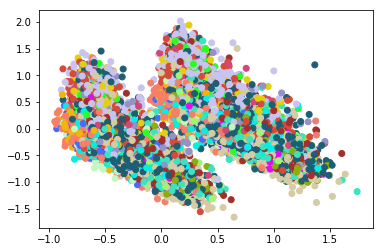

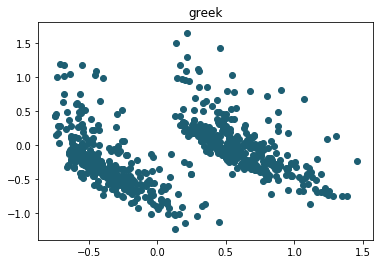

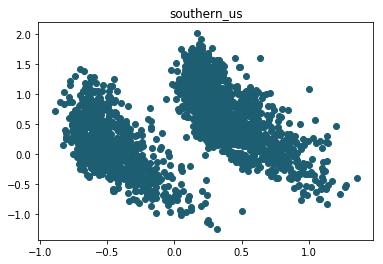

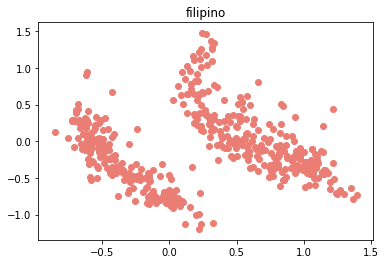

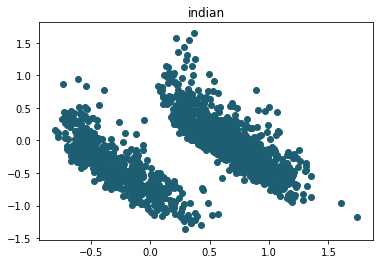

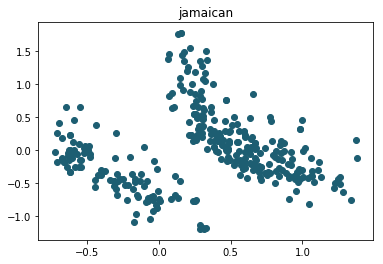

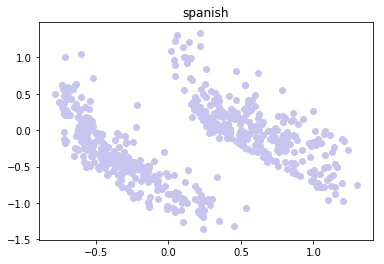

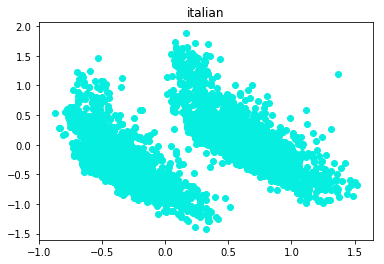

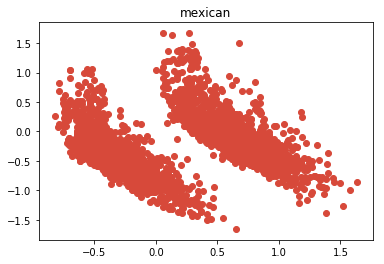

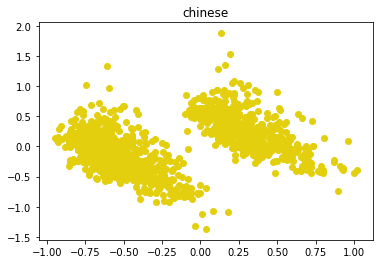

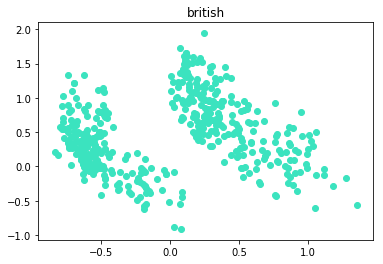

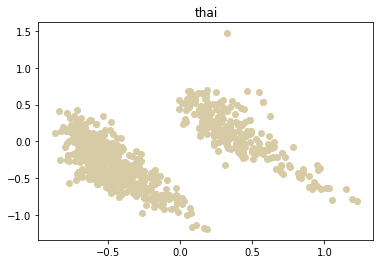

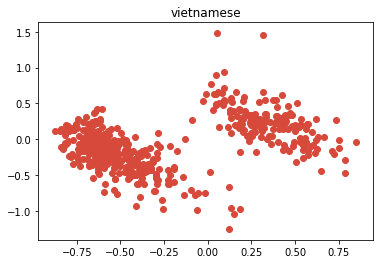

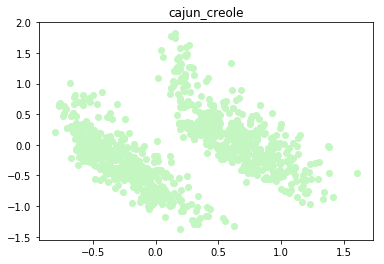

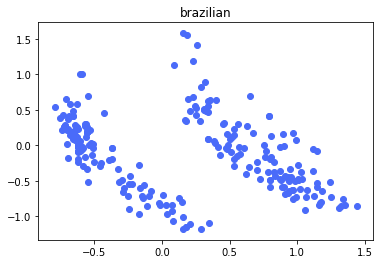

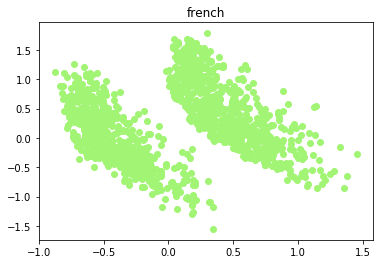

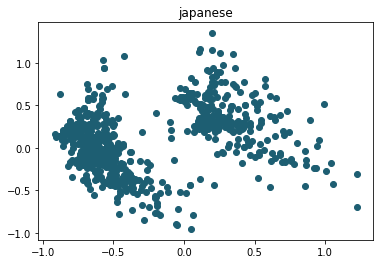

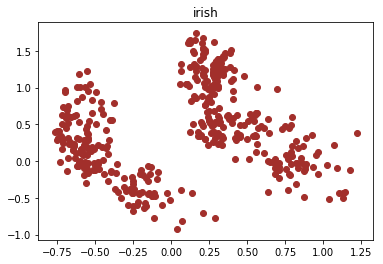

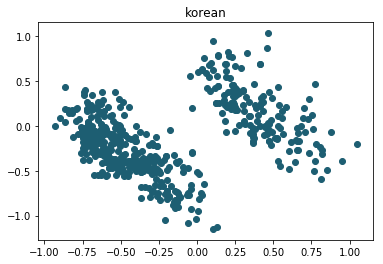

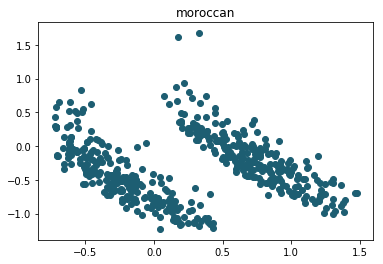

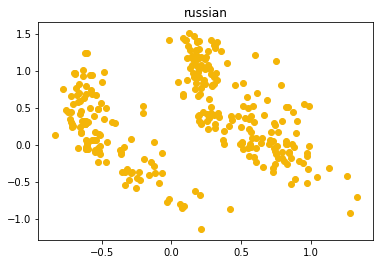

In [64]:
# random list of 20 colors for plotting
color_list = ['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for _ in range(0,20)]

x_pca = two_dim_pca.transform(x_train)
colors =[color_list[i] for i in svm_y_train]

#print(colors[7])

plt.scatter(x_pca[:, 0], x_pca[:,1], c = colors)
plt.show()

cnum = 0
for cus in cuisines :
    xs = []
    ys = []
    for i in range(0,len(svm_y_train)) :
        if cuisines[svm_y_train[i]] == cus :
            xs.append(x_pca[i,0])
            ys.append(x_pca[i,1])

    plt.scatter(xs, ys, c = colors[cnum])
    plt.title(cus)
    plt.show()
    cnum = cnum + 1

In [16]:
for n in range(10,252, 10) :
    pca = PCA(n_components = n)
    pca.fit(x_train)
    x_pca = pca.transform(x_train)
    clf = svm.LinearSVC(C = 0.1) # create svm classifier 
    clf.fit(x_pca, svm_y_train)
    svm_predictions = clf.predict(pca.transform(x_val))
    error = accuracy_score(svm_predictions, svm_y_val)
    print("Using PCA with %d components and an svm with C = 0.1, we get an accurary of %f" % (n, error))
    print("")

Using PCA with 10 components and an svm with C = 0.1, we get an accurary of 0.413262

Using PCA with 20 components and an svm with C = 0.1, we get an accurary of 0.501728

Using PCA with 30 components and an svm with C = 0.1, we get an accurary of 0.535669

Using PCA with 40 components and an svm with C = 0.1, we get an accurary of 0.559082

Using PCA with 50 components and an svm with C = 0.1, we get an accurary of 0.574481

Using PCA with 60 components and an svm with C = 0.1, we get an accurary of 0.582338

Using PCA with 70 components and an svm with C = 0.1, we get an accurary of 0.590823

Using PCA with 80 components and an svm with C = 0.1, we get an accurary of 0.607322

Using PCA with 90 components and an svm with C = 0.1, we get an accurary of 0.617536

Using PCA with 100 components and an svm with C = 0.1, we get an accurary of 0.624450

Using PCA with 110 components and an svm with C = 0.1, we get an accurary of 0.631364

Using PCA with 120 components and an svm with C = 0.

In [18]:
for n in range(300, 1001, 100) :
    pca = PCA(n_components = n)
    pca.fit(x_train)
    x_pca = pca.transform(x_train)
    clf = svm.LinearSVC(C = 0.1) # create svm classifier 
    clf.fit(x_pca, svm_y_train)
    svm_predictions = clf.predict(pca.transform(x_val))
    error = accuracy_score(svm_predictions, svm_y_val)
    print("Using PCA with %d components and an svm with C = 0.1, we get an accurary of %f" % (n, error))
    print("")

Using PCA with 300 components and an svm with C = 0.1, we get an accurary of 0.706474

Using PCA with 400 components and an svm with C = 0.1, we get an accurary of 0.724859

Using PCA with 500 components and an svm with C = 0.1, we get an accurary of 0.739472

Using PCA with 600 components and an svm with C = 0.1, we get an accurary of 0.745443

Using PCA with 700 components and an svm with C = 0.1, we get an accurary of 0.752514

Using PCA with 800 components and an svm with C = 0.1, we get an accurary of 0.757228

Using PCA with 900 components and an svm with C = 0.1, we get an accurary of 0.764142

Using PCA with 1000 components and an svm with C = 0.1, we get an accurary of 0.763828



In [19]:
for n in range(1100, 1501, 100) :
    pca = PCA(n_components = n)
    pca.fit(x_train)
    x_pca = pca.transform(x_train)
    clf = svm.LinearSVC(C = 0.1) # create svm classifier 
    clf.fit(x_pca, svm_y_train)
    svm_predictions = clf.predict(pca.transform(x_val))
    error = accuracy_score(svm_predictions, svm_y_val)
    print("Using PCA with %d components and an svm with C = 0.1, we get an accurary of %f" % (n, error))
    print("")

Using PCA with 1100 components and an svm with C = 0.1, we get an accurary of 0.765713

Using PCA with 1200 components and an svm with C = 0.1, we get an accurary of 0.769642

Using PCA with 1300 components and an svm with C = 0.1, we get an accurary of 0.772156

Using PCA with 1400 components and an svm with C = 0.1, we get an accurary of 0.772627

Using PCA with 1500 components and an svm with C = 0.1, we get an accurary of 0.775456



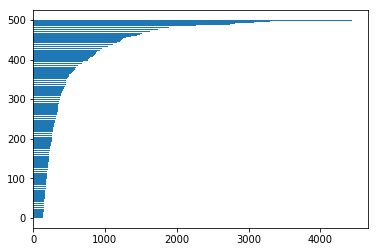

1757



In [41]:
import collections 

ing_count = collections.Counter(raw_ingredients)

values = sorted(list(ing_count.values()))

plt.barh(np.arange(500), values[-510:-10])
plt.show()

for i in range(len(values)-1, -1, -1) :
    if values[i] == 1 :
        print(i)
        break
        

print()

In [65]:
sorted_by_value = sorted(ing_count.items(), key=lambda kv: kv[1], reverse = True)

print("The 200 must used ingredients:")
print("")

for ing, count in sorted_by_value[0:200] :
    print("%s is used in %d recipies" % (ing,count))
    

print("")
print("")
print("Ingredients that are only used in 1 recipe:")
print("")
for ing, count in sorted_by_value :
    if count == 1 :
        print("%s is used in %d recipies" % (ing,count))
    

The 200 must used ingredients:

salt is used in 18049 recipies
onions is used in 7972 recipies
olive oil is used in 7972 recipies
water is used in 7457 recipies
garlic is used in 7380 recipies
sugar is used in 6434 recipies
garlic cloves is used in 6237 recipies
butter is used in 4848 recipies
ground black pepper is used in 4785 recipies
all-purpose flour is used in 4632 recipies
pepper is used in 4438 recipies
vegetable oil is used in 4385 recipies
eggs is used in 3388 recipies
soy sauce is used in 3296 recipies
kosher salt is used in 3113 recipies
green onions is used in 3078 recipies
tomatoes is used in 3058 recipies
large eggs is used in 2948 recipies
carrots is used in 2814 recipies
unsalted butter is used in 2782 recipies
ground cumin is used in 2747 recipies
extra-virgin olive oil is used in 2747 recipies
black pepper is used in 2627 recipies
milk is used in 2263 recipies
chili powder is used in 2036 recipies
oil is used in 1970 recipies
red bell pepper is used in 1939 recipies


baby okra is used in 1 recipies
extra is used in 1 recipies
padron peppers is used in 1 recipies
farfalline is used in 1 recipies
honey whiskey is used in 1 recipies
Pillsburyâ„¢ Crescent Recipe CreationsÂ® refrigerated seamless dough sheet is used in 1 recipies
sodium free chicken stock is used in 1 recipies
mesquite flavored seasoning mix is used in 1 recipies
low-fat crÃ¨me fraÃ®che is used in 1 recipies
stellette is used in 1 recipies
skinless and boneless chicken breast fillet is used in 1 recipies
Karo Corn Syrup is used in 1 recipies
flower petals is used in 1 recipies
chiltepÃ­n is used in 1 recipies
garlic olive oil is used in 1 recipies
cake mix or white yellow is used in 1 recipies
creamed spinach is used in 1 recipies
crumpet is used in 1 recipies
boned skinned duck breast halves is used in 1 recipies
yoghurt natural low fat is used in 1 recipies
lapsang souchong is used in 1 recipies
raspberry fruit spread is used in 1 recipies
smoked chorizo is used in 1 recipies
limeade 